In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt; t = Okt()

import matplotlib.pyplot as plt
import platform

from wordcloud import WordCloud
from konlpy.tag import Kkma
from wordcloud import ImageColorGenerator

import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

from matplotlib import font_manager, rc

kkma = Kkma()
title ='말레피센트 2'

In [84]:
def get_word(title):
    text = open(title+'/'+title+'.txt','r',-1,"utf-8").read()
    tokens = t.nouns(text)

    # 1글자 , 영화 제거
    tokens = [word for word in tokens if len(word) > 1 and word != '영화']

    word = nltk.Text(tokens, name='영화 리뷰')
    
    return word

In [85]:
def get_wrodcloud(word,title):

    # 폰트설정
    if platform.system()  == 'Darwin':
        rc('font',family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
        print('unknown system')
    
    %matplotlib inline

    data = word.vocab().most_common(1000)
    tmp_data = dict(data)
    
    movie_coloring = np.array(Image.open(title+'/'+title+'.jpg'))

    image_colors = ImageColorGenerator(movie_coloring)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                         relative_scaling = 0.08, mask=movie_coloring,
                         background_color='white',max_words = 2000#,min_font_size=1,max_font_size=20,random_state=50
                         ).generate_from_frequencies(tmp_data)

    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
    plt.axis('off')
    plt.savefig(title+'/'+title+'.png', format="png")
    plt.show()


In [86]:
word = get_word(title)

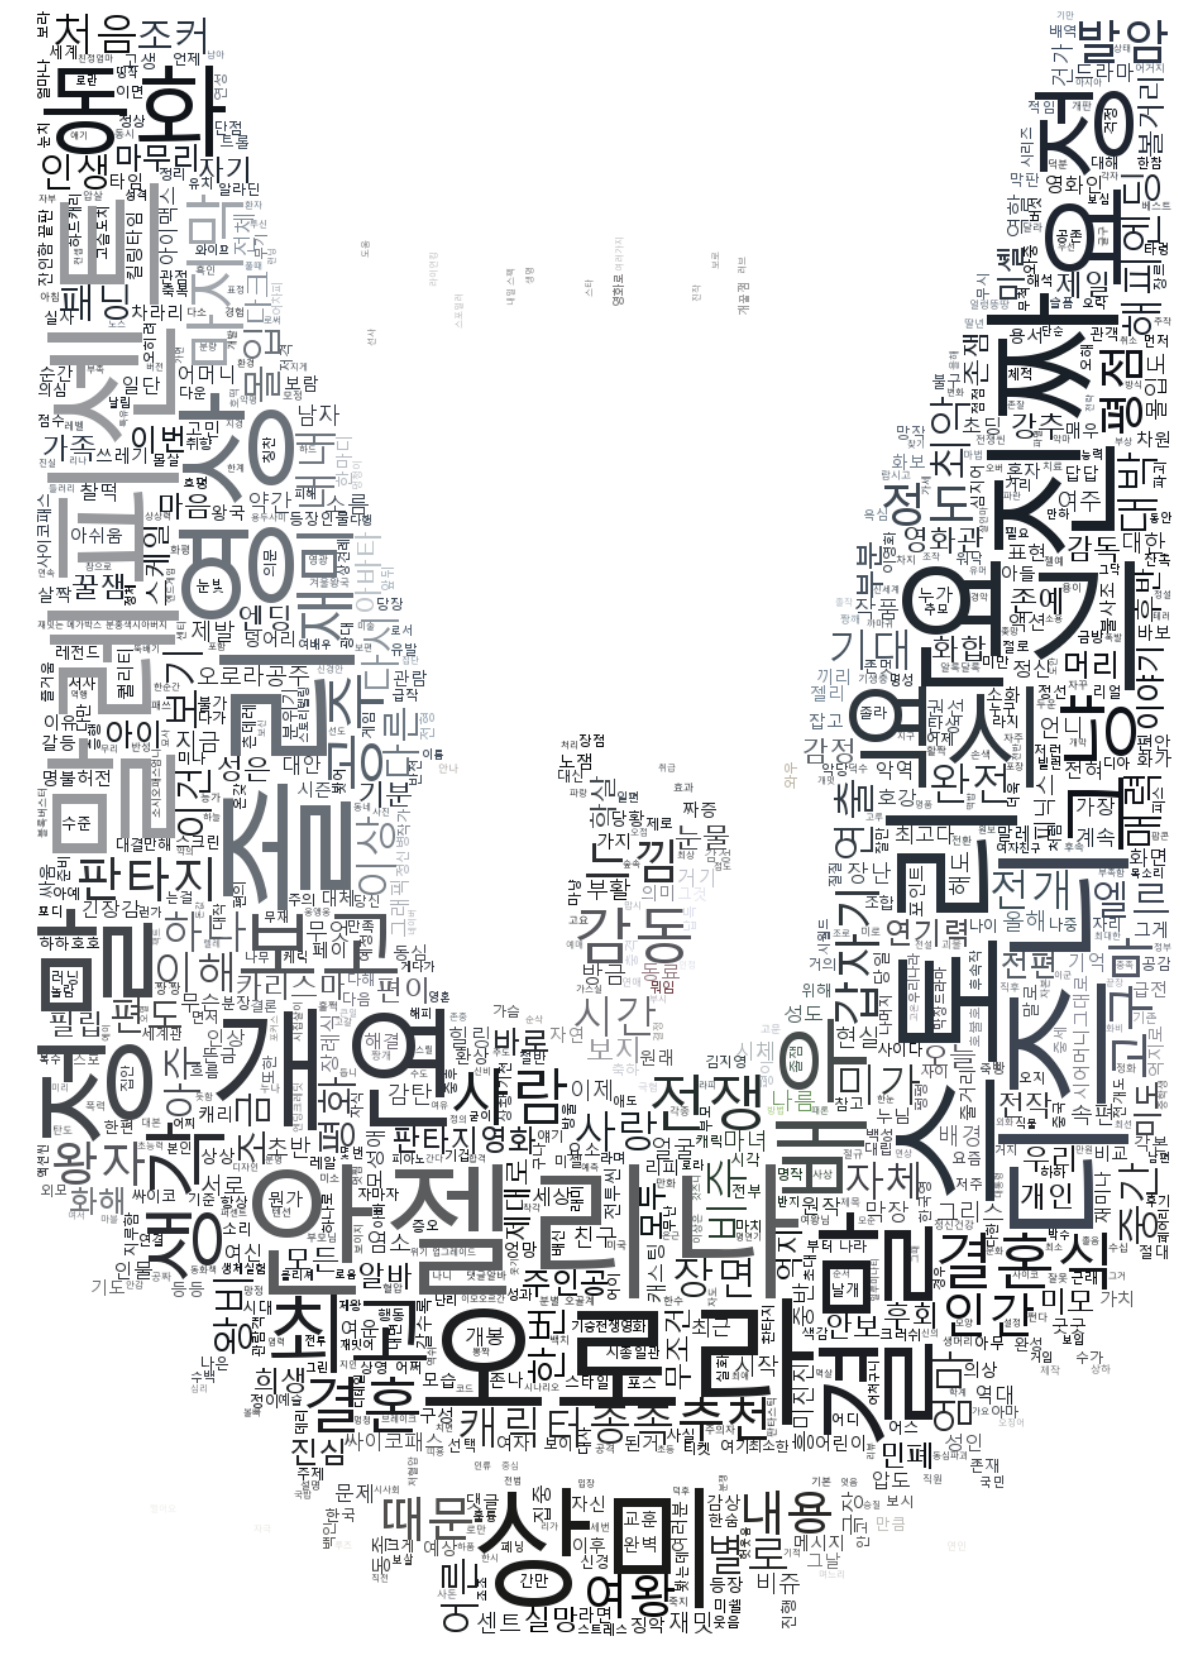

In [87]:
get_wrodcloud(word,title)